# 範例目標:
1. 實做繪製圖表
2. 藉由圖表對資料有初步認識，並解釋圖表意義

折線圖 : `df.plot()`<br>
直方圖 : `plt.hist()`<br>
圓餅圖 : `df.plot.pie()`<br>
長條圖 : `df.plot.bar(stacked=T/F)`<br>
      - 多組數據 : https://blog.csdn.net/mighty13/article/details/113873617<br>
箱型圖 : `df.boxplot()`<br>
散佈圖 : `df.plot.scatter(x=, y=)`<br>


圖上標籤 : `plt.text()` https://www.cainiaojc.com/note/qagw8d.html

圖例 : `plt.legend()` https://zhuanlan.zhihu.com/p/41781440


# 範例重點:
1. 每一種圖表都有相對應用的情境，分辨情境並繪製對應圖表
2. 圖像化展現，方便對於資料有初步的理解

# [教學目標]

* 知道 DataFrame 中迴圈的運作規則
* 了解 DataFrame 中 Map、 Apply、Applymap 差異
* 知道不建議在 DataFrame 進行迭代操作的原因
  - DataFrame 當中的 For Loop
  - 橫向的資料迭代
  - `iteritems()`、`iterrows()`、`itertuples()`
  - `apply`、`map`、`applymap`
    - Series有一個元素級函數的map方法。
    - 而**DataFrame只有applymap**
  - 補充：lambda 匿名函式

In [10]:
import pandas as pd
import numpy as np

**單一折線圖**

`df.plot()`

2020-01-01    -0.766039
2020-01-02    -0.066920
2020-01-03    -0.056777
2020-01-04    -1.224550
2020-01-05    -2.142749
                ...    
2020-07-14    10.447323
2020-07-15    10.461333
2020-07-16    10.806932
2020-07-17     9.540854
2020-07-18     9.130294
Freq: D, Length: 200, dtype: float64


<AxesSubplot:>

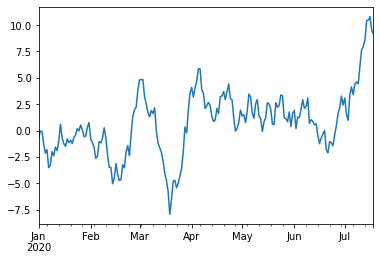

In [11]:
ts = pd.Series(np.random.randn(200), index=pd.date_range('1/1/2020', periods=200))
ts = ts.cumsum()
print(ts)
ts.plot()

**多個折線圖同時畫出**

使用DataFrame

                   A         B          C
2020-01-01 -0.953415 -0.354152  -0.408099
2020-01-02  0.233029 -0.767158   0.558029
2020-01-03 -0.335425 -1.281052  -0.632613
2020-01-04  0.674171 -1.601462  -1.235974
2020-01-05 -0.556837 -3.709992  -0.495768
...              ...       ...        ...
2020-07-14  9.557809  5.202312  14.496581
2020-07-15  9.818423  5.804652  14.904374
2020-07-16  9.632261  5.637724  18.263554
2020-07-17  9.417531  4.557232  19.007175
2020-07-18  8.070503  4.151239  21.468301

[200 rows x 3 columns]


<AxesSubplot:>

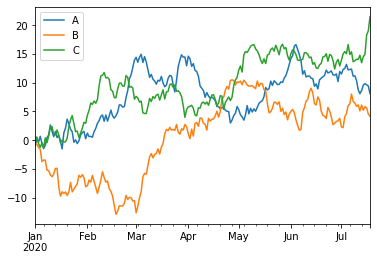

In [12]:
df = pd.DataFrame(np.random.randn(200, 3), index=pd.date_range('1/1/2020', periods=200), columns=["A","B","C"])
df = df.cumsum()
print(df)
df.plot()

**圓餅圖**

`df.plot.pie()`

A    0.502143
B    0.117624
C    0.608219
D    0.947163
Name: title, dtype: float64


<AxesSubplot:ylabel='title'>

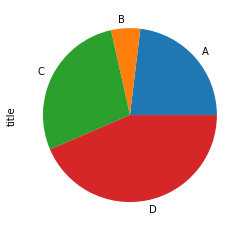

In [13]:
df = pd.Series(np.random.rand(4), index=["A","B","C","D"],name="title")
print(df)
df.plot.pie()

**長條圖**

`df.plot.bar(stacked=T/F)`

          A         B
0  0.566071  0.556274
1  0.134915  0.557911
2  0.041150  0.601553
3  0.307100  0.547344
4  0.883477  0.780467
5  0.133470  0.457969
6  0.662762  0.399359
7  0.187158  0.646811
8  0.559074  0.343285
9  0.664380  0.169201


<AxesSubplot:>

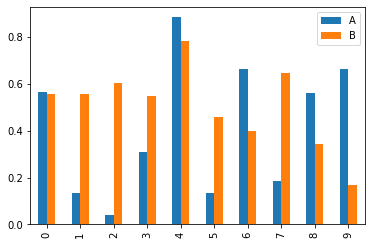

In [14]:
df = pd.DataFrame(np.random.rand(10, 2), columns=["A","B"])
print(df)
df.plot.bar()

<AxesSubplot:>

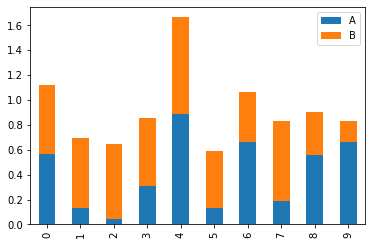

In [15]:
df.plot.bar(stacked=True)

**箱型圖**

`df.boxplot()`

          A         B
0  0.019150  0.806763
1  0.175689  0.082467
2  0.870787  0.447325
3  0.992377  0.866574
4  0.268053  0.313915
5  0.825511  0.518368
6  0.481334  0.120710
7  0.996201  0.082551
8  0.678790  0.674056
9  0.660354  0.036574


<AxesSubplot:>

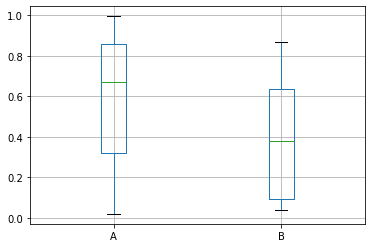

In [16]:
df = pd.DataFrame(np.random.rand(10, 2), columns=["A","B"])
print(df)
df.boxplot()

**散佈圖**

`df.plot.scatter(x=, y=)`

          A         B
0  0.671638  0.408834
1  0.326912  0.548444
2  0.386744  0.686631
3  0.833324  0.533809
4  0.995813  0.643041
5  0.631774  0.127882
6  0.178349  0.124597
7  0.731087  0.535845
8  0.730052  0.748414
9  0.064912  0.210291


<AxesSubplot:xlabel='A', ylabel='B'>

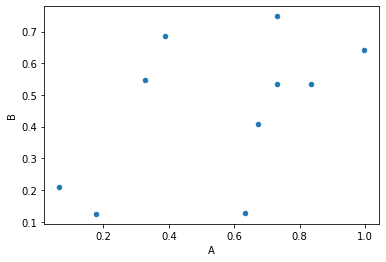

In [17]:
df = pd.DataFrame(np.random.rand(10, 2), columns=["A","B"])
print(df)
df.plot.scatter(x='A', y='B')

# Numpy 運算

DataFrame 當中的 For Loop

In [18]:
import pandas as pd

df = pd.DataFrame({
  'name': ['Alice', 'Bob'],
  'age': [20, 32]
})

for c in df:
  print(c)


name
age


橫向的資料迭代

In [24]:
import pandas as pd

df = pd.DataFrame({
  'name': ['Alice', 'Bob'],
  'age': [20, 32]
})

for i in range(len(df)):
  print(df.iloc[i])

name    Alice
age        20
Name: 0, dtype: object
name    Bob
age      32
Name: 1, dtype: object


`iteritems()`

In [26]:
for d in df.iteritems():
  print(d)


('name', 0    Alice
1      Bob
Name: name, dtype: object)
('age', 0    20
1    32
Name: age, dtype: int64)


`iterrows()`

In [27]:
for d in df.iterrows():
  print(d)


(0, name    Alice
age        20
Name: 0, dtype: object)
(1, name    Bob
age      32
Name: 1, dtype: object)


`itertuples()`

In [28]:
for d in df.itertuples():
  print(d)

Pandas(Index=0, name='Alice', age=20)
Pandas(Index=1, name='Bob', age=32)


`apply`

In [29]:
import numpy as np
import pandas as pd

df = pd.DataFrame({
  'score': [98, 67, 85],
  'age': [20, 32, 28]
})

df.apply(np.max)
# score    98
# age      32
# dtype: int64

df.apply(np.min)
# score    67
# age      20
# dtype: int64

df.apply(lambda x: x.max() - x.min())
# score    31
# age      12
# dtype: int64


score    31
age      12
dtype: int64

`map`

map() 函式，它可以將一個函式對映到一個可列舉型別上面

Series有一個元素級函數的map方法。而dataframe只有applymap

In [30]:
import numpy as np
import pandas as pd

df = pd.DataFrame({
  'score': [98, 67, 85],
  'age': [20, 32, 28]
})

df['age'].map(lambda x: -x)


0   -20
1   -32
2   -28
Name: age, dtype: int64

In [31]:
df['age'].apply(lambda x: -x)

0   -20
1   -32
2   -28
Name: age, dtype: int64

`applymap`

將一個函式對映到整個可列舉型別 DataFrame 上面

In [32]:
import numpy as np
import pandas as pd

df = pd.DataFrame({
  'score': [98, 67, 85],
  'age': [20, 32, 28]
})

df.applymap(lambda x: -x)


,score,age
0,-98,-20
1,-67,-32
2,-85,-28


**補充：lambda 匿名函式**

In [33]:
df.apply(lambda x: x.max() - x.min())
# score    31
# age      12
# dtype: int64


score    31
age      12
dtype: int64

In [34]:
def f(x):
  return x.max() - x.min()
print(df.apply(f))
# score    31
# age      12
# dtype: int64


score    31
age      12
dtype: int64
